In [3]:
import pandas as pd

# Load the dataset
file_path = "mcp_analysis.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display basic statistics of numerical columns
print("\nDescriptive Statistics:")
print(data.describe())

# Check for unique values in each column
print("\nUnique Values in Each Column:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   owner                                  228 non-null    object 
 1   repo                                   228 non-null    object 
 2   github_stars                           228 non-null    int64  
 3   download_count                         228 non-null    float64
 4   experimental_ai_generated_description  227 non-null    object 
 5   risk_category                          228 non-null    object 
 6   security_score                         228 non-null    float64
 7   popularity_score                       228 non-null    float64
 8   doc_quality_score                      228 non-null    float64
 9   doc_quality_adjustment                 228 non-null    float64
 10  readme_found                           228 non-null    objec

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the relationship between github_stars and download_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='github_stars', y='download_count', alpha=0.7)
plt.title('Relationship between GitHub Stars and Download Count')
plt.xlabel('GitHub Stars')
plt.ylabel('Download Count')
plt.grid(True)
plt.show()

# Analyze correlation between numerical columns
correlation = combined_data[numerical_columns].corr()
print("Correlation Matrix:")
print(correlation)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Assuming the columns for forks and commits are named 'forks' and 'commits' in the dataset
popularity_columns = ['github_stars', 'download_count', 'forks', 'commits']

# Filter only the columns that exist in the dataset
existing_columns = [col for col in popularity_columns if col in data.columns]

# Calculate statistics for the existing columns
popularity_stats = {}

for col in existing_columns:
    popularity_stats[col] = {
        'mean': data[col].mean(),
        'median': data[col].median(),
        'std_dev': data[col].std()
    }

# Display the statistics
for col, stats in popularity_stats.items():
    print(f"Statistics for {col}:")
    print(f"  Mean: {stats['mean']}")
    print(f"  Median: {stats['median']}")
    print(f"  Standard Deviation: {stats['std_dev']}")
    print()

Statistics for github_stars:
  Mean: 3423.253086419753
  Median: 317.5
  Standard Deviation: 9267.096867503786

Statistics for download_count:
  Mean: 0.0
  Median: 0.0
  Standard Deviation: 0.0



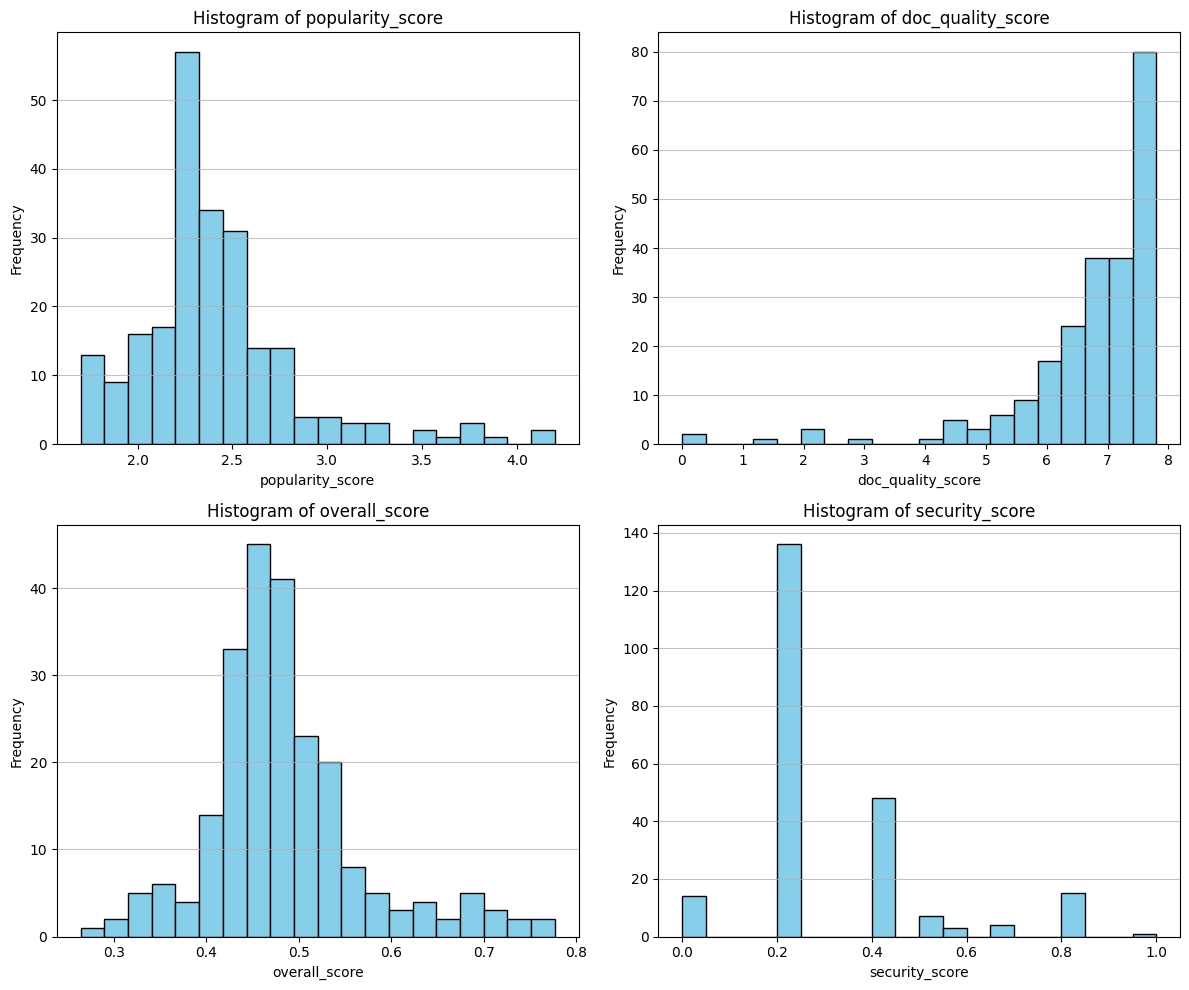

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
final_servers_data = pd.read_csv("FinalData/final_top_server_without_official.csv")

# List of columns to plot histograms for
score_columns = ['popularity_score', 'doc_quality_score', 'overall_score', 'security_score']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each histogram in a subplot
for idx, column in enumerate(score_columns):
    if column in final_servers_data.columns:
        axes[idx].hist(final_servers_data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Histogram of {column}')
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.75)
    else:
        print(f"Column '{column}' not found in the dataset.")

# Adjust layout and save as PNG
plt.tight_layout()
plt.savefig("FinalData/final_top_server_without_official.png", dpi=300)
plt.show()
